Implementation de la formule de Black - Scholes en python

In [30]:
import numpy as np
from scipy.stats import norm

### Définition des variables ###

r = 0.01                                # Interest Rate
S = 30                                  # Underline
K = 40                                  # Strike Price
T = 240/365                             # Time
sigma = 0.30                            # Volatility

### Définition de la fonction ###

def BlackScholes(r, S, K, T, sigma, type ="c"):
    d1 = (np.log(S/K) + (r + sigma**2/2) * T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    try:
        if type == "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

print(f"Option price : {BlackScholes(r, S, K, T, sigma,type="c")}")

Option price : 0.5132843798399405


DELTA

Delta mesure le taux de variation de la valeur théorique d'une option par rapport aux variations du prix de l'actif sous-jacent.

![alt text](image.png)

In [31]:
def delta_calc(r, S, K, T, sigma, type="c"):
    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    try:
        if type == "c":
            delta_calc = norm.cdf(d1, 0, 1)
        elif type == "p":
            delta_calc = -norm.cdf(-d1, 0, 1)
        return delta_calc
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")


GAMMA

Gamma mesure le taux de variation du delta par rapport aux variations du prix de l'actif sous-jacent.

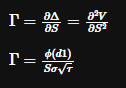

In [32]:
def gamma_calc(r, S, K, T, sigma, type="c"):
    "Calculate gamma of a option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        gamma_calc = norm.pdf(d1, 0, 1)/(S*sigma*np.sqrt(T))
        return gamma_calc
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

VEGA

Vega mesure la sensibilité à la volatilité. Il s'agit de la dérivée de la valeur de l'option par rapport à la volatilité de l'actif sous-jacent.

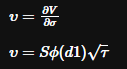

In [33]:
def vega_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        vega_calc = S*norm.pdf(d1, 0, 1)*np.sqrt(T)
        return vega_calc*0.01
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

THETA

Theta mesure la sensibilité de la valeur du dérivé au passage du temps, également appelé érosion temporelle.

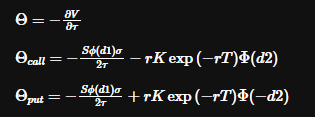

In [34]:
def theta_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return theta_calc/365
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

RHO

Rho mesure la sensibilité de la valeur de l'option aux variations du taux d'intérêt.

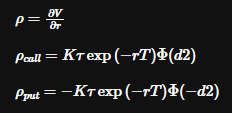

In [35]:
def rho_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            rho_calc = K*T*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            rho_calc = -K*T*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return rho_calc*0.01
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

Enfin :

In [36]:
option_type='c'

print("Option Price: ", round(BlackScholes(r, S, K, T, sigma, option_type), 3))
print("       Delta: ", round(delta_calc(r, S, K, T, sigma, option_type), 3))
print("       Gamma: ", round(gamma_calc(r, S, K, T, sigma, option_type), 3))
print("       Vega : ", round(vega_calc(r, S, K, T, sigma, option_type), 3))
print("       Theta: ", round(theta_calc(r, S, K, T, sigma, option_type), 3))
print("       Rho  : ", round(rho_calc(r, S, K, T, sigma, option_type), 3))

Option Price:  0.513
       Delta:  0.151
       Gamma:  0.032
       Vega :  0.057
       Theta:  -0.004
       Rho  :  0.026
